## IMPORT LIBRARIES/DATASETS AND VISUALIZE STOCKS DATA

In [ ]:
pip install pandas_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bc239401328fd0eab04f3a1163cc9cdc9068f2b42b0c085939c562db110a848a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd

import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [ ]:
#Read the stock data file
stocks_df = pd.read_csv('/content/stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
#Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


## CALCULATE DAILY RETURNS

In [ ]:
#Function to calculate the daily returns
def daily_returns(df):
  df_daily_return = df.copy()
  for i in df.columns[1:]:
    for j in range(1, len(df)):
      df_daily_return[i][j] = ((df[i][j] - df[i][j-1])/df[i][j-1])*100

      df_daily_return[i][0] = 0
  return df_daily_return

In [ ]:
#Get the daily returns
stocks_daily_return = daily_returns(stocks_df)
stocks_daily_return

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


In [ ]:
#Average daily return
stocks_daily_return.drop('Date', axis=1).mean()

,0
AAPL,0.107695
BA,0.065907
T,0.008159
MGM,0.064662
AMZN,0.151122
IBM,-0.006091
TSLA,0.238398
GOOG,0.084392
sp500,0.049316


## CALCULATE BETA FOR A SINGLE STOCK

In [ ]:
#Apple stock
stocks_daily_return['AAPL']

,AAPL
0,0.000000
1,-0.374946
2,1.164812
3,1.038382
4,-0.316937
...,...
2154,0.362467
2155,3.488923
2156,-2.449458
2157,1.453480


In [ ]:
#S&P500 (Market)
stocks_daily_return['sp500']

,sp500
0,0.000000
1,-0.494792
2,0.355295
3,1.110793
4,0.493866
...,...
2154,0.642974
2155,0.642770
2156,0.063303
2157,0.274222


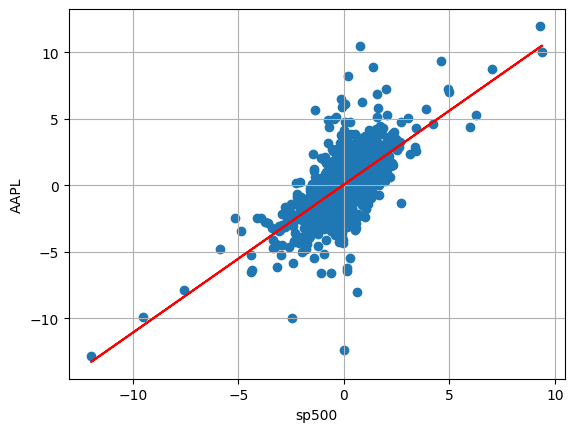

Beta for AAPL stock is 1.1128924148678097 & alpha is = 0.052812084694402905


In [ ]:
#Plot a scatter plot between the selected stock and the S&P500 (Market)
plt.scatter(stocks_daily_return['sp500'], stocks_daily_return['AAPL'])
plt.xlabel('sp500')
plt.ylabel('AAPL')
plt.grid()

#Add beta & alpha to plot
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)

#add regression line (beta) - y = beta [stockvsmkt- stock volatility] * rm [stock daily return] + alpha [excess return on top of mkt return]
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')
plt.show()

# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)
print('Beta for {} stock is {} & alpha is = {}'.format('AAPL', beta, alpha))


**MINI CHALLENGE #3:**
- **Using Yahoo Finance or any other site, verify whether the obtained Beta for AAPL makes sense or not**
- **Calculate Beta for Tesla Inc. and compare it with published Yahoo Finance values**

In [ ]:
#Verified Betas using yahoo finance: https://finance.yahoo.com/quote/AAPL/key-statistics/
#https://finance.yahoo.com/quote/TSLA/key-statistics/

In [ ]:
# According to Yahoo Fianance:                   Tesla Beta (5 years) is = 2.31.                      APPLE Beta (5 years) is = 1.24

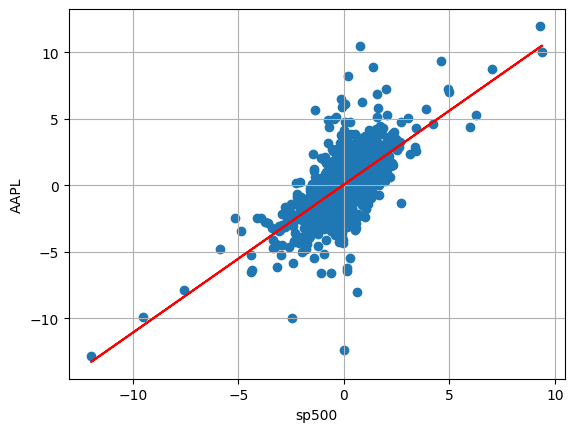

Beta for AAPL stock is 1.1128924148678097 & alpha is = 0.052812084694402905


In [ ]:
plt.scatter(stocks_daily_return['sp500'], stocks_daily_return['AAPL'])
plt.xlabel('sp500')
plt.ylabel('AAPL')
plt.grid()

plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')
plt.show()

beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)

print('Beta for {} stock is {} & alpha is = {}'.format('AAPL', beta, alpha))

## APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK (AAPL)

In [ ]:
beta

1.2686150101095903

In [ ]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

0.04931600660038911

In [ ]:
# Let's calculate the annualized rate of return for S&P500
#Assume 252 working days per year

rm = stocks_daily_return['sp500'].mean() * 252
rm

12.427633663298055

In [ ]:
#Use this to verify average daily return: https://dqydj.com/sp-500-return-calculator/

In [ ]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0


In [ ]:
# Calculate return for any security (APPL) using CAPM
Exp_return_AAPL = rf + (beta * (rm - rf))
Exp_return_AAPL

13.830619238640256

## CALCULATE BETA FOR ALL STOCKS

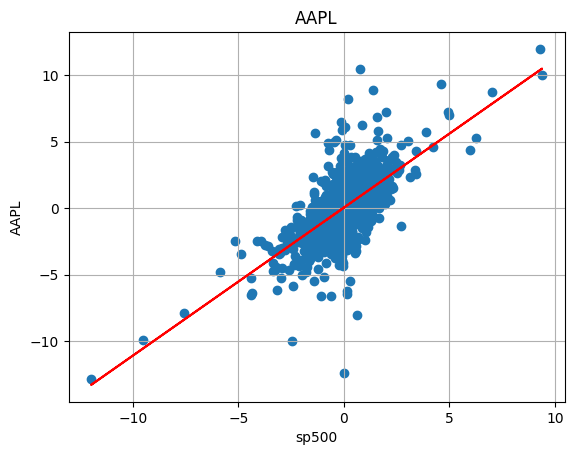

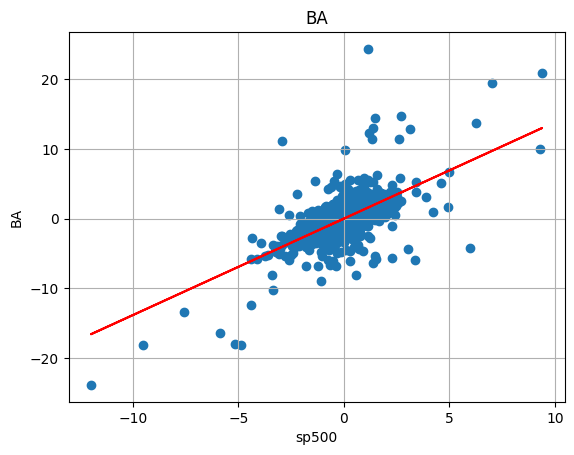

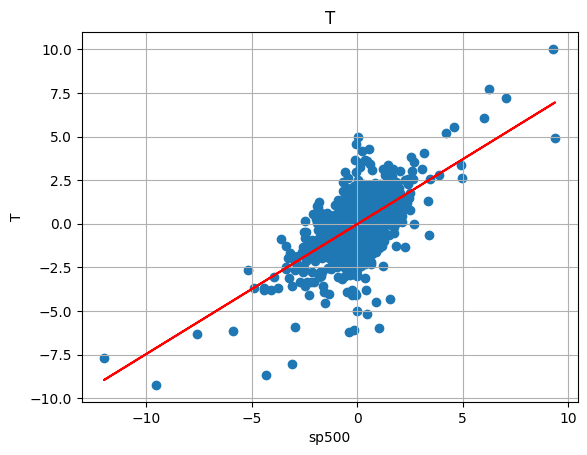

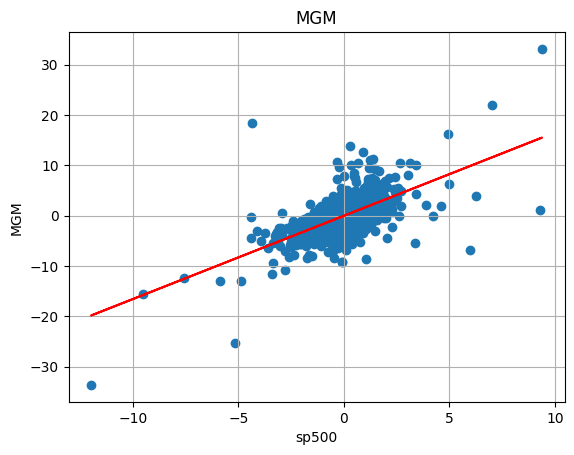

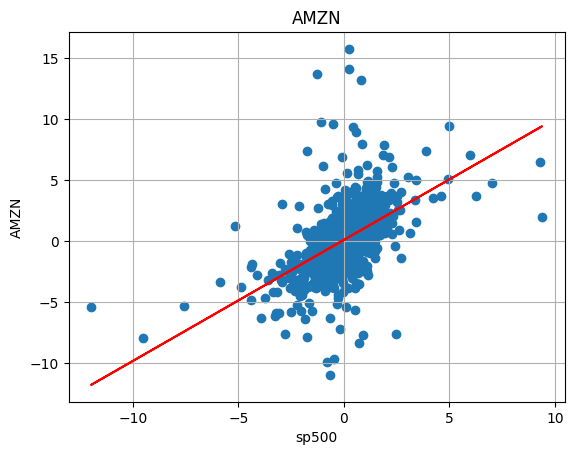

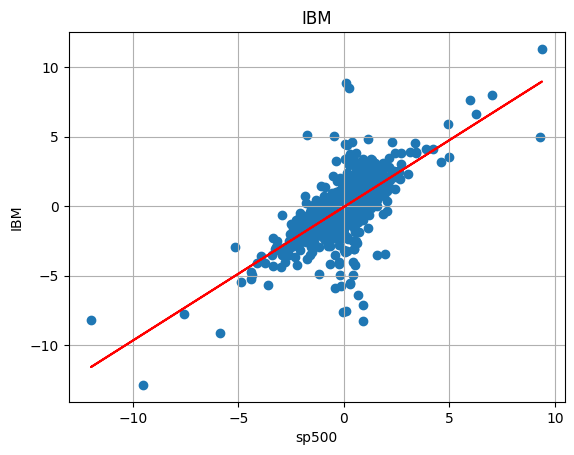

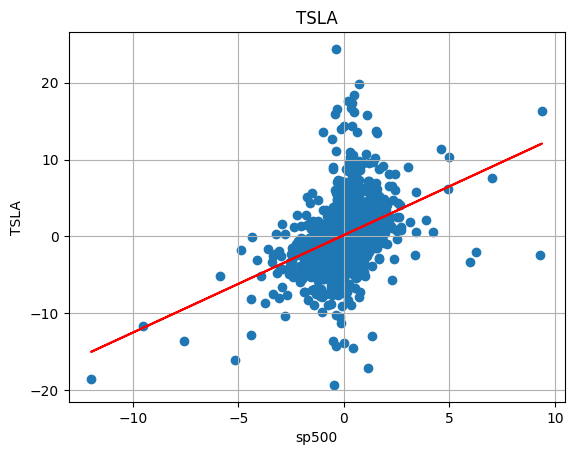

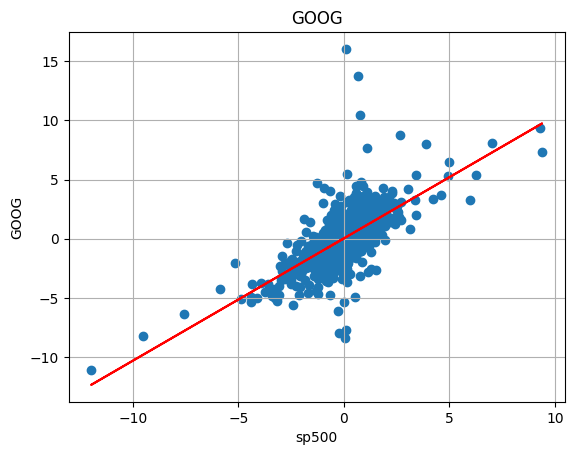

In [ ]:
#Create a placeholder for all betas and alphas
beta = {}
alpha = {}

for i in stocks_daily_return.columns[1:]:
  if i != 'sp500'and i != 'Date':

    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i, title = i)
    plt.scatter(stocks_daily_return['sp500'], stocks_daily_return[i])
    plt.xlabel('sp500')
    plt.ylabel(i)
    beta[i], alpha[i] = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    plt.plot(stocks_daily_return['sp500'], beta[i] * stocks_daily_return['sp500'] + alpha[i], '-', color = 'r')

    plt.grid()
    plt.show()


In [ ]:
#Beta for every stock
beta

{'AAPL': 1.1128924148678097,
 'BA': 1.3828672010892775,
 'T': 0.7446293454747844,
 'MGM': 1.653567706518011,
 'AMZN': 0.9917345712576846,
 'IBM': 0.9604149148095246,
 'TSLA': 1.2686150101095903,
 'GOOG': 1.0348817687428562}

In [ ]:
#Alpha for every stock (indicates the “excess return”)
alpha

{'AAPL': 0.052812084694402905,
 'BA': -0.0022906983297531543,
 'T': -0.028563430198461616,
 'MGM': -0.016885305520478674,
 'AMZN': 0.1022139641776522,
 'IBM': -0.05345494150445116,
 'TSLA': 0.17583492165165812,
 'GOOG': 0.03335558721467016}

**MINI CHALLENGE #5:**
- **Using Plotly Express, plot an interactive plot showing S&P500 daily returns vs. every stock**
- **Plot the best fit straight line (with Alpha and Beta values)**  


In [ ]:

for i in stocks_daily_return.columns:
  if i != 'sp500'and i != 'Date':

    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)
    beta[i], alpha[i] = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    fig.add_scatter(x = stocks_daily_return['sp500'], y = beta[i] * stocks_daily_return['sp500'] + alpha[i])

    fig.show()



## APPLY CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [24]:
# Obtain a list of all stock names
stock_names = list(beta.keys())
stock_names

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [25]:
# Define the expected return dictionary
ER = {}

rf = 0
rm = stocks_daily_return['sp500'].mean() * 252
for i in stock_names:
  ER[i] = rf + (beta[i] * (rm - rf))
ER

{'AAPL': 13.830619238640256,
 'BA': 17.185766980127866,
 'T': 9.253980720502028,
 'MGM': 20.549933694065793,
 'AMZN': 12.324913942818466,
 'IBM': 11.935684726020382,
 'TSLA': 15.765882605403148,
 'GOOG': 12.861131506762153}

In [26]:
for i in stock_names:
  print('Expected return for {} is {}%'.format(i, ER[i]))

Expected return for AAPL is 13.830619238640256%
Expected return for BA is 17.185766980127866%
Expected return for T is 9.253980720502028%
Expected return for MGM is 20.549933694065793%
Expected return for AMZN is 12.324913942818466%
Expected return for IBM is 11.935684726020382%
Expected return for TSLA is 15.765882605403148%
Expected return for GOOG is 12.861131506762153%


In [27]:
Portfolio_weights = 1/8 * np.ones(8)
Portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [29]:
# Assume equal weights in the portfolio, calculate returns
ER_portfolio = sum(list(ER.values()) * Portfolio_weights)
ER_portfolio

14.21348917679251